In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 1. Pendulum

다음처럼 주어지는 진자의 운동방정식을 풀어라.
$$ \frac{d^2 \theta}{dt^2}  + \frac{g}{L} \sin \theta = 0.$$ $\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다. 흔히 작은 $\theta$를 가정하고 $\sin\theta \approx \theta$ 근사를 이용하여 해석적인 해를 구한다. 여기에서는 $\sin \theta$를 직접 이용하여 수치해를 구해보자.

2차 미분방정식을 2개의 1차 미분방정식으로 분리하자.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \frac{g}{L} \sin \theta . $$

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다.

In [2]:
def sin(θ):
    return np.sin(θ)

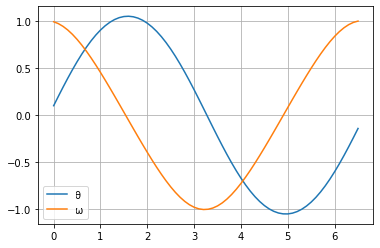

In [3]:
g, L = 9.8, 9.8
dt = 0.1
t = np.arange(0,2.1*np.pi,dt)
θ , ω = np.array([]), np.array([])
θ0, ω0 = 0, 1
for i in t:
    θ0 = θ0 + dt*ω0
    ω0 = ω0 - dt*(g/L)*sin(θ0)
    θ=np.append(θ,θ0)
    ω=np.append(ω,ω0)
plt.plot(t,θ, label='θ')
plt.plot(t,ω, label='ω')
plt.legend()
plt.grid()

일반적인 단진자 운동의 결과와 같이 $w$가 최소가 될 때 $sin(\theta)$가 최대가 되었으며 반대로 $sin(\theta)$가 최소가 되는 경우 $w$가 최대가 됨을 보임

# 2. Pendulum (small oscillations)


1번 문제와 같은 진자에 대해 평형점 근처에서 조금씩 진동하고 있는 상황을 고려하자. 그러면
$\sin\theta \approx \theta$ 근사를 적용할 수 있다.

이 경우는 다음과 같은 2개의 1차 미분방정식을 얻는다.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} =  - \frac{g}{L} \theta . $$

$\frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다. 초기 조건 $\theta_o, w_o$를 바꾸어 가면서 1번 문제의 결과와 비교해보자.

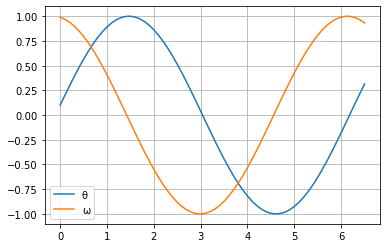

In [19]:
g, L = 9.8, 9.8
dt = 0.1
t = np.arange(0,2.1*np.pi,dt)
θ , ω = np.array([]), np.array([])
θ0, ω0 = 0, 1
for i in t:
    θ0 = θ0 + dt*ω0
    ω0 = ω0 - dt*(g/L)*θ0
    θ=np.append(θ,θ0)
    ω=np.append(ω,ω0)
plt.plot(t,θ, label='θ')
plt.plot(t,ω, label='ω')
plt.legend()
plt.grid()

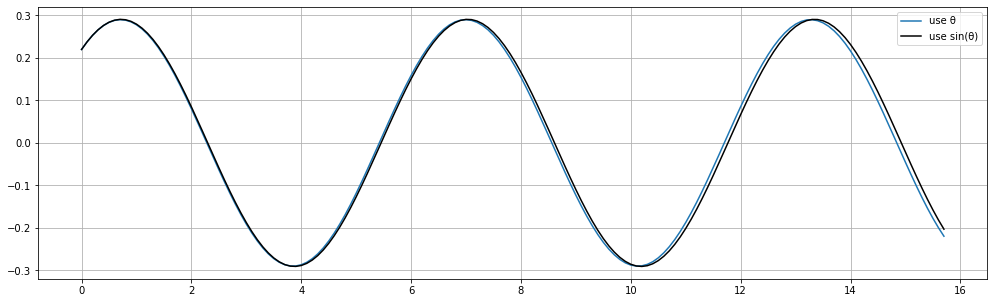

In [4]:
def sin(θ):
    return np.sin(θ)
g, L = 9.8, 9.8
dt = 0.1
t = np.arange(0,5*np.pi,dt)
θ , ω = np.array([]), np.array([])
θ0, ω0 = 0.2, 0.2
for i in t:
    θ0 = θ0 + dt*ω0
    ω0 = ω0 - dt*(g/L)*θ0
    θ=np.append(θ,θ0)
    ω=np.append(ω,ω0)


g, L = 9.8, 9.8
dT = 0.1
T = np.arange(0,5*np.pi,dT)
seta , w = np.array([]), np.array([])
seta0, w0 = 0.2, 0.2
for i in t:
    seta0 = seta0 + dT*w0
    w0 = w0 - dT*(g/L)*sin(seta0)
    seta = np.append(seta,seta0)
    w = np.append(w,w0)

plt.figure(figsize=(17,5))
plt.plot(t,θ, label='use θ')
plt.plot(T, seta, label='use sin(θ)', color='black')
plt.legend()
plt.grid()

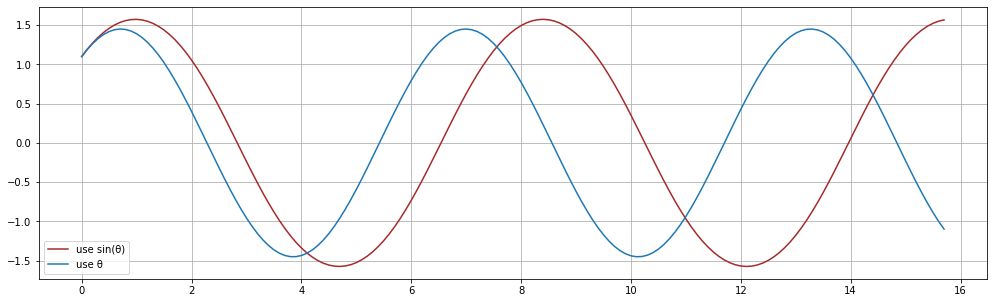

In [5]:
def sin(θ):
    return np.sin(θ)
g, L = 9.8, 9.8
dt = 0.1
t = np.arange(0,5*np.pi,dt)
θ , ω = np.array([]), np.array([])
θ0, ω0 = 1, 1
for i in t:
    θ0 = θ0 + dt*ω0
    ω0 = ω0 - dt*(g/L)*θ0
    θ=np.append(θ,θ0)
    ω=np.append(ω,ω0)
dT = 0.1
T = np.arange(0,5*np.pi,dT)
seta , w = np.array([]), np.array([])
seta0, w0 = 1, 1
for i in t:
    seta0 = seta0 + dT*w0
    w0 = w0 - dT*(g/L)*sin(seta0)
    seta = np.append(seta,seta0)
    w = np.append(w,w0)

plt.figure(figsize=(17,5))
plt.plot(T, seta, label='use sin(θ)', color='brown')
plt.plot(t,θ, label='use θ')
plt.legend()
plt.grid()

$sin(\theta)$가 아닌 $\theta$를 사용 할 경우 $\theta_0$의 값이 늘어남에 따라서 $sin(\theta)$를 사용한 값과 오차를 보임 

# 3. Damped Pendulum

다음처럼 주어지는 damped 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = 0. $$ $\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도이다.

우선 2차 미분방정식을 2개의 1차 미분방정식으로 분리해 보자.$$ \frac{d\theta}{dt} = w, \\
\frac{d w}{dt} = - \beta w - \frac{g}{L} \sin \theta . $$

초기 상태는 $\theta_0 = 1, w_0 =0$이며 $\beta=0.1, \frac{g}{L}=1$을 가정하고 운동의 해를 구해보자. scipy.integrate.odeint를 포함하여 어떤 방법을 이용하여도 된다. 

In [6]:
θ0, ω0, β, g, L = 1, 0, 0.1, 9.8, 9.8
def sin(θ):
    return np.sin(θ)
dt = 0.1
t = np.arange(0,30*np.pi,dt)
θ, ω = np.array([]), np.array([])
for i in t:
    θ0 = θ0 + dt*ω0
    ω0 = ω0 - dt*β*ω0-dt*g/L*sin(θ0)
    θ=np.append(θ,θ0)
    ω=np.append(ω,ω0)

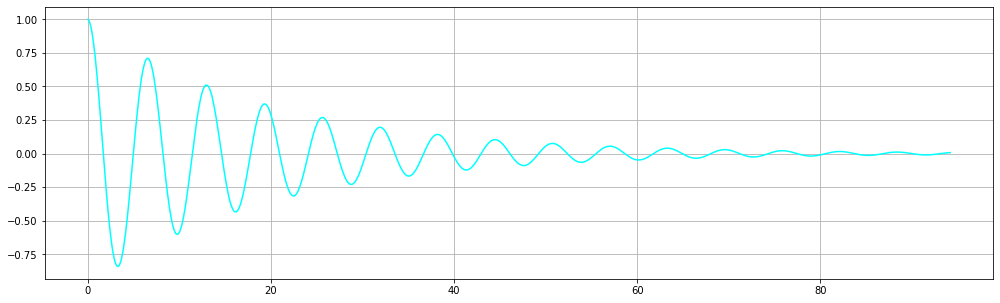

In [7]:
plt.figure(figsize=(17,5))
plt.plot(t,θ,color='cyan')
plt.grid()

# 4. Forced Pendulum

다음처럼 주어지는 forced 진자의 운동방정식을 풀어라.$$ \frac{d^2 \theta}{dt^2} + \beta \frac{d \theta}{dt} + \frac{g}{L} \sin \theta = A \cos (v t). $$ $\beta$는 마찰의 세기, $L$은 진자의 길이, $g$는 중력가속도, $A$는 외부에서 주어지는 힘의 진폭, $v$는 외부에서 주어지는 힘의 진동수이다.

forced 진자의 움직임을 구해보고 $v$의 효과에 대해 살펴보아라. 

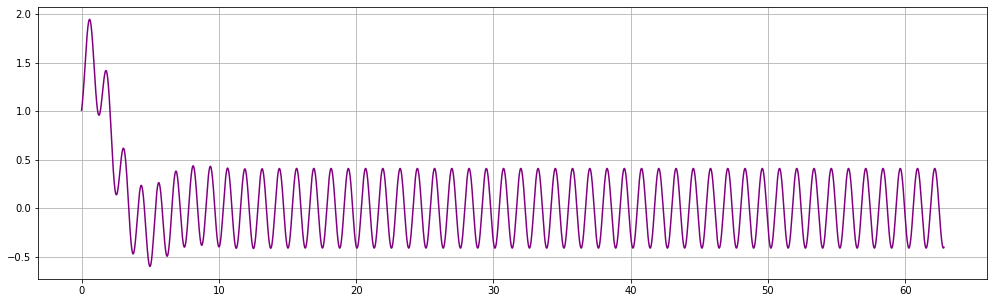

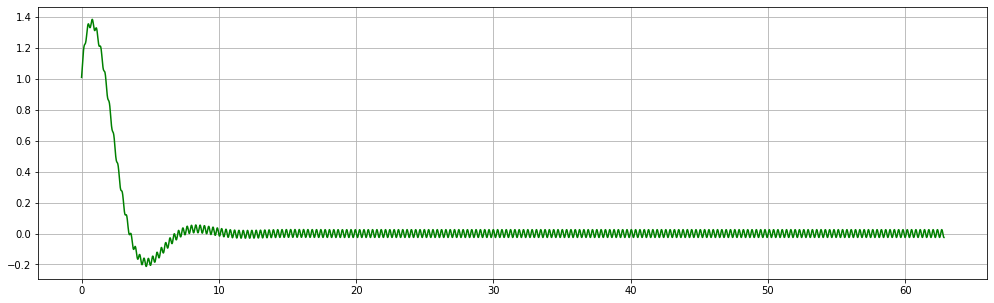

In [16]:
θ0, ω0, seta0, w0, β, g, L, A = 1, 1, 1, 1, 1, 9.8, 9.8, 0.1
def sin(θ):
    return np.sin(θ)
def cos(θ):
    return np.cos(θ)


dt = 0.01
t = np.arange(0,20*np.pi,dt)
v = 5
V = 20
θ, ω = np.array([]), np.array([])
seta, w = np.array([]), np.array([])

for i in t:
    θ0 = θ0 + dt*ω0
    ω0 = ω0 - dt*β*ω0 - dt * g/L * sin(θ0) + A * cos(i*v)
    θ=np.append(θ,θ0)
    ω=np.append(ω,ω0)
plt.figure(figsize=(17,5))
plt.plot(t,θ, color='purple')
plt.grid()

for i in t:
    seta0 = seta0 + dt*w0
    w0 = w0 - dt*β*w0 - dt * g/L * sin(seta0) + A * cos(V * i)
    seta = np.append(seta,seta0)
    w = np.append(w,w0)
plt.figure(figsize=(17,5))
plt.plot(t,seta, color = 'green')
plt.grid()

강제 진동의 경우 초기조건에 의한 시스템 내부의 운동이 외부의 힘에 영향을 받아 결국 외부 힘의 진동수 $v$에 의해 바뀌게 된다.

-1

4번 문제의 결과는 감쇠계수(β)를 너무 크게 줬기 때문에 t>10 정도의 영역에서, 직접 쓰신 표현을 빌리면, 시스템 내부의 운동이 0이 되었기에 그런 것 아닐까요?